# Classification of Images from the CIFAR-10 Dataset using CNN.

The CIFAR-10 dataset consists of color 60,000 images each with 32 x 32 pixel in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

* Class labels are: 

airplane : 0,
automobile : 1,
bird : 2,
cat : 3,
deer : 4,
dog : 5,
frog : 6,
horse : 7,
ship : 8,
truck : 9.

In [4]:
pip install --upgrade tensorflow


   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.8/390.3 MB 12.6 MB/s eta 0:00:31
   ---------------------------------------- 3.1/390.3 MB 8.4 MB/s eta 0:00:47
   ---------------------------------------- 4.7/390.3 MB 7.7 MB/s eta 0:00:51
    --------------------------------------- 5.8/390.3 MB 7.2 MB/s eta 0:00:54
    --------------------------------------- 6.6/390.3 MB 6.9 MB/s eta 0:00:56
    --------------------------------------- 7.3/390.3 MB 6.1 MB/s eta 0:01:03
    --------------------------------------- 8.4/390.3 MB 5.7 MB/s eta 0:01:07
    --------------------------------------- 9.2/390.3 MB 5.6 MB/s eta 0:01:09
   - -------------------------------------- 10.5/390.3 MB 5.5 MB/s eta 0:01:09
   - -------------------------------------- 11.8/390.3 MB 5.6 MB/s eta 0:01:08
   - -------------------------------------- 13.1/390.3 MB 5.7 MB/s eta 0:01:07
   - -------------------------------------- 14.4/390.3 MB 5.7 MB/s 

  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.


In [9]:
!pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical


Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl (390.3 MB)
Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl (127 kB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


ImportError: cannot import name '_saturate_cast' from 'keras.src.ops.core' (C:\Users\kalim\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\core.py)

## Load data.

In [10]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 48s 0us/step


### Show some sample images of data set with corresponding labels.

Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


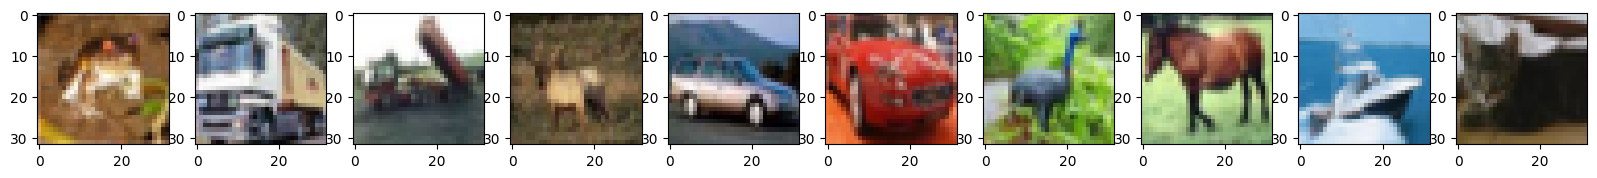

In [12]:
import matplotlib.pyplot as plt

cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()


In [13]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## Preparing the dataset

1) Normalize the input data

In [14]:
X_train = x_train / 255
X_test = x_test / 255

2) One-hot encoding using keras for labels

In [18]:
# num_classes =10
# Y_train = np_utils.to_categorical(y_train,num_classes =10)
# Y_test = np_utils.to_categorical(y_test, num_classes= 10)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [21]:
print("Train data shapes")
print(X_train.shape)
print(y_train.shape)
print("Test data shapes")
print(X_test.shape)
print(y_test.shape)

Train data shapes
(50000, 32, 32, 3)
(50000, 10)
Test data shapes
(10000, 32, 32, 3)
(10000, 10)


# Build a CNN model to classify CIFAR -10 images.

In [22]:
model = Sequential()
# Add 2 convolutional layers
model.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(32, kernel_size = (3,3), strides=(1,1), padding='same', activation= 'relu'))
# Add maxpool layer
model.add(MaxPool2D(pool_size= (2,2)))

# Add flatten layer
model.add(Flatten())
# Add Dense layers for hidden and output

model.add(Dense(256, activation= 'relu'))
model.add(Dense(num_classes,activation= 'softmax'))

C:\Users\kalim\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Have a look at the summary of constructed CNN model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,110,122 (8.05 MB)

 Trainable params: 2,110,122 (8.05 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# compile the model
model.compile(loss= 'categorical_crossentropy', metrics= ['accuracy'], optimizer= 'adam')

In [26]:
# Train the CNN model
Info = model.fit(X_train, y_train, batch_size= 128, epochs= 10, verbose=2, validation_split= 0.2)

Epoch 1/10
313/313 - 25s - 81ms/step - accuracy: 0.4673 - loss: 1.5016 - val_accuracy: 0.5645 - val_loss: 1.2298
Epoch 2/10
313/313 - 21s - 69ms/step - accuracy: 0.6211 - loss: 1.0847 - val_accuracy: 0.6152 - val_loss: 1.1005
Epoch 3/10
313/313 - 21s - 67ms/step - accuracy: 0.6821 - loss: 0.9140 - val_accuracy: 0.6625 - val_loss: 0.9857
Epoch 4/10
313/313 - 21s - 68ms/step - accuracy: 0.7217 - loss: 0.7956 - val_accuracy: 0.6806 - val_loss: 0.9437
Epoch 5/10
313/313 - 21s - 67ms/step - accuracy: 0.7604 - loss: 0.6873 - val_accuracy: 0.6874 - val_loss: 0.9344
Epoch 6/10
313/313 - 21s - 68ms/step - accuracy: 0.7987 - loss: 0.5807 - val_accuracy: 0.6800 - val_loss: 0.9909
Epoch 7/10
313/313 - 21s - 67ms/step - accuracy: 0.8386 - loss: 0.4699 - val_accuracy: 0.6904 - val_loss: 0.9631
Epoch 8/10
313/313 - 21s - 68ms/step - accuracy: 0.8794 - loss: 0.3603 - val_accuracy: 0.6784 - val_loss: 1.1167
Epoch 9/10
313/313 - 21s - 67ms/step - accuracy: 0.9088 - loss: 0.2751 - val_accuracy: 0.6677 - 

With the below simple function we will be able to plot our training history.

In [27]:
def plotLosses(Info):  
    plt.plot(Info.history['loss'])
    plt.plot(Info.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

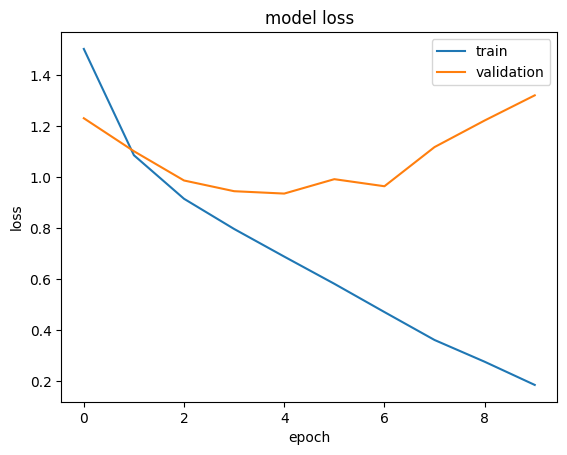

In [28]:
plotLosses(Info)

By the above loss plot, 
* the training loss is decreasing and,
* the validation loss decreased for some epochs and then it increased.
It is called as overfitting. 
* To fix this we need to Regularize our model by adding Dropouts to our CNN model. Let's do it and observe the changes.

# Regularization

Lets build the CNN model with dropouts

In [29]:
model= Sequential()
# Add 2 convolution layers
model.add(Conv2D(32,kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
# Add Dropaut Layer
model.add(Dropout(0.25))

# Add flatten layer
model.add(Flatten())
# Add Dense layers for hidden and output

model.add(Dense(256, activation= 'relu'))
model.add(Dense(num_classes,activation= 'softmax'))

C:\Users\kalim\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,110,122 (8.05 MB)

 Trainable params: 2,110,122 (8.05 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss='categorical_crossentropy', metrics= ['accuracy'], optimizer= 'adam')

We will store the training loss values and metrics in a Info object, so we can visualize the training process later.

In [33]:
# Train the CNN model
Info = model.fit(X_train, y_train, batch_size= 128, epochs= 10, verbose=2, validation_split= 0.2)

Epoch 1/10
313/313 - 27s - 85ms/step - accuracy: 0.4805 - loss: 1.4504 - val_accuracy: 0.5732 - val_loss: 1.2226
Epoch 2/10
313/313 - 23s - 73ms/step - accuracy: 0.6078 - loss: 1.1104 - val_accuracy: 0.6165 - val_loss: 1.0964
Epoch 3/10
313/313 - 23s - 73ms/step - accuracy: 0.6629 - loss: 0.9609 - val_accuracy: 0.6504 - val_loss: 0.9979
Epoch 4/10
313/313 - 23s - 73ms/step - accuracy: 0.7010 - loss: 0.8499 - val_accuracy: 0.6711 - val_loss: 0.9396
Epoch 5/10
313/313 - 23s - 74ms/step - accuracy: 0.7347 - loss: 0.7560 - val_accuracy: 0.6782 - val_loss: 0.9294
Epoch 6/10
313/313 - 23s - 74ms/step - accuracy: 0.7663 - loss: 0.6689 - val_accuracy: 0.6810 - val_loss: 0.9380
Epoch 7/10
313/313 - 24s - 76ms/step - accuracy: 0.7995 - loss: 0.5779 - val_accuracy: 0.6889 - val_loss: 0.9241
Epoch 8/10
313/313 - 23s - 74ms/step - accuracy: 0.8285 - loss: 0.4912 - val_accuracy: 0.6930 - val_loss: 0.9350
Epoch 9/10
313/313 - 22s - 72ms/step - accuracy: 0.8581 - loss: 0.4083 - val_accuracy: 0.6926 - 

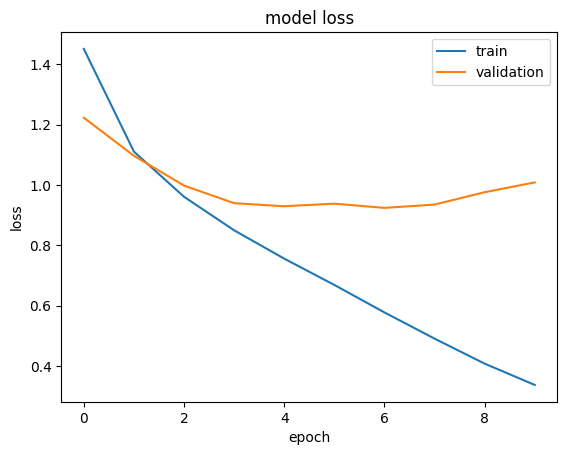

In [34]:
plotLosses(Info)

Compare with the CNN model with out dropout layer, current model is somewhat better. BUt still lot more can be to improved to get better results.

**Evaluating the our CNN model**

In [36]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [37]:
print(model.metrics_names)
print(score)

['loss', 'compile_metrics']
[1.0272496938705444, 0.689300000667572]


# The END






